In [13]:
import pandas as pd #Importamos librerías
import numpy as np
from matplotlib import *

# 1.

In [14]:
datos=pd.read_csv('exoplanets.csv',low_memory=False)
df=pd.DataFrame(datos) #Creamos un dataframe con el archivo dado.
datos_necesarios=pd.DataFrame() #Creamos un dataframe vacío en el que iremos agragando las columnas de datos necesarios.
datos_necesarios=datos_necesarios.assign(NAME=df["NAME"].values)
datos_necesarios=datos_necesarios.assign(TEFF=df["TEFF"].values)
datos_necesarios=datos_necesarios.assign(MASS=df["MASS"].values)
datos_necesarios=datos_necesarios.assign(A=df["A"].values)
datos_necesarios=datos_necesarios.assign(DENSITY=df["DENSITY"].values)
datos_necesarios=datos_necesarios.assign(R=df["R"].values)
datos_necesarios=datos_necesarios.assign(STAR=df["STAR"].values)
datos_necesarios=datos_necesarios.assign(MSTAR=df["MSTAR"].values)
datos_necesarios=datos_necesarios.assign(RSTAR=df["RSTAR"].values)
datos_necesarios=datos_necesarios.assign(BINARY=df["BINARY"].values)

print(datos_necesarios) #Verificamos.



               NAME    TEFF      MASS         A  DENSITY         R  \
0      Kepler-107 d  5851.0  0.003712  0.078010      NaN  0.095459   
1     Kepler-1049 b  3864.0  0.002453  0.034472      NaN  0.085000   
2      Kepler-813 b  5743.0  0.015970  0.137610      NaN  0.191000   
3      Kepler-427 b  5800.0  0.290000  0.091351     0.16  1.230000   
4     Kepler-1056 b  6127.0  0.027126  0.185149      NaN  0.269000   
...             ...     ...       ...       ...      ...       ...   
5742    KOI 7978.01  6297.0  0.012544  0.082100      NaN  0.148096   
5743    KOI 7982.01  6231.0  0.033310  1.028700      NaN  0.290838   
5744    KOI 8193.01  5570.0  0.045399  0.995500      NaN  0.331877   
5745    KOI 7986.01  6119.0  0.000983  0.029000      NaN  0.064234   
5746    KOI 7988.01  4989.0  1.000000  1.223300      NaN  1.721834   

             STAR  MSTAR  RSTAR  BINARY  
0      Kepler-107    NaN  1.411     0.0  
1     Kepler-1049  0.510  0.490     0.0  
2      Kepler-813  0.950  0.930  

# 2.

In [15]:
datos_necesarios.drop(datos_necesarios[datos_necesarios['BINARY'] == 0].index, inplace = True) 
#Desacartamos los sistemas binarios, eliminamos los datos de la columna que sean iguales a cero.

# 3.

In [38]:
datos_necesarios["MASSE"]= datos_necesarios["MASS"]*317.91
#Creamos una columna en masas terrestres con el factor de conversión 317.91.

# 4.

In [39]:
datos_necesarios["RE"]= datos_necesarios["R"]*11.209
#Creamos una columna en radios terrestres con el factor de conversión 11.209.

# 5.

In [40]:
datos_necesarios["LUM"]= ((datos_necesarios["RSTAR"]/69.911*10**3)**2)*((datos_necesarios["TEFF"])**4)*(4*np.pi)*(56704*(10**(-1*8)))
#Añadimos la columna LUM realizando las operaciones debidas en unidades SI.

# 6.

In [41]:
ai=(2.7619)*np.e**(-1*5)
bi=(3.8095)*np.e**(-1*9)
ao=(1.3786)*np.e**(-1*4)
bo=(1.4286)*np.e**(-1*9)

datos_necesarios["ri"]= (datos_necesarios["LUM"]*0.5)*(0.72-ai*(datos_necesarios["TEFF"]-5780)-bi*(datos_necesarios["TEFF"]-5780)**2)
datos_necesarios["ro"]= (datos_necesarios["LUM"]*0.5)*(1.77-ao*(datos_necesarios["TEFF"]-5780)-bo*(datos_necesarios["TEFF"]-5780)**2)
#Añadimos las columnas de la zona de habitabilidad, realizando las operaciones debidas.

# 7.

In [42]:
datos_necesarios.drop(datos_necesarios[datos_necesarios['DENSITY'] <= 5].index, inplace = True) 
#Descartamos los planetas con densidad inferior a 5.

# 8.

In [43]:
datos_necesarios.drop(datos_necesarios[datos_necesarios['ri'] < 0].index, inplace = True) 
datos_necesarios.drop(datos_necesarios[datos_necesarios['ro'] < 0].index, inplace = True) 
#Desacartamos los planetas que no se encuentra en la zona de habitabilidad.
datos_necesarios

,NAME,TEFF,MASS,A,DENSITY,R,STAR,MSTAR,RSTAR,BINARY,MASSE,RE,LUM,ri,ro
130,Kepler-310 d,5797.0,0.019315,0.401368,NaN,0.220359,Kepler-310,NaN,0.876,1.0,6.140432,2.470004,1.263438e+15,1.691557e+14,8.147908e+14
175,HD 145934 b,NaN,2.283820,4.606900,NaN,NaN,HD 145934,1.748,5.380,1.0,726.049216,NaN,NaN,NaN,NaN
202,Kepler-1365 b,5770.0,0.002158,0.076313,NaN,0.082000,Kepler-1365,1.000,1.050,1.0,0.686196,0.919138,1.781617e+15,7.652780e+14,1.785955e+15
239,Kepler-293 c,5804.0,0.046301,0.280136,NaN,0.341690,Kepler-293,NaN,0.957,1.0,14.719710,3.830003,1.515186e+15,1.951910e+12,8.049054e+14
258,Kepler-793 b,5745.0,0.008666,0.050937,NaN,0.122000,Kepler-793,0.980,0.970,1.0,2.755014,1.367498,1.494294e+15,5.942995e+14,1.821378e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,KOI 7928.01,NaN,NaN,NaN,NaN,NaN,KOI 7928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5710,KOI 8157.01,NaN,NaN,NaN,NaN,NaN,KOI 8157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5715,KOI 8270.01,5741.0,0.015916,0.929000,NaN,0.186458,KOI 8270,0.934,0.898,NaN,5.059984,2.090004,1.277131e+15,4.666028e+14,1.587851e+15
5720,KOI 7954.01,5769.0,0.013103,0.975800,NaN,0.155233,KOI 7954,0.900,0.812,NaN,4.165441,1.740003,1.064748e+15,4.620043e+14,1.078811e+15


# 9.

## a)


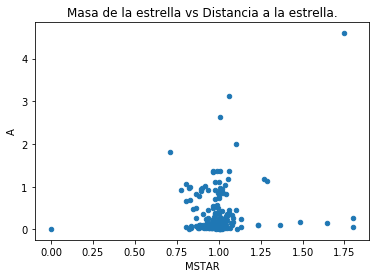

In [44]:
datos_necesarios.plot.scatter(x='MSTAR', y='A') #Graficamos masa vs distancia del planeta a la estrella.
pyplot.title("Masa de la estrella vs Distancia a la estrella.")
pyplot.show()

## b)

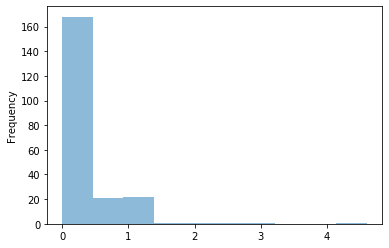

In [45]:
datos_necesarios['A'].plot.hist(alpha=0.5) #Distancia del planeta a su estrella.
pyplot.xlabel("")
pyplot.show()

## c)

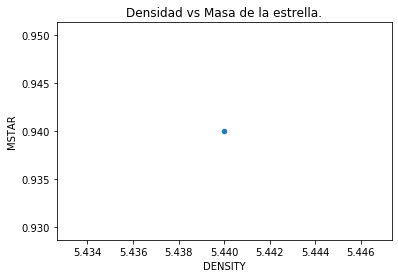

In [46]:
datos_necesarios.plot.scatter(x='DENSITY', y='MSTAR') #Graficamos densidad del planeta vs masa de la estrella.
pyplot.title("Densidad vs Masa de la estrella.")
pyplot.show()

## d)


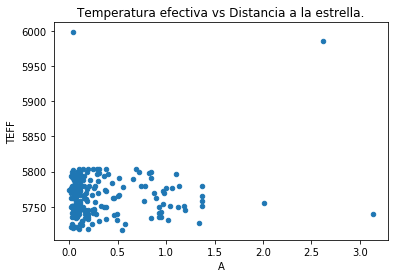

In [47]:
datos_necesarios.plot.scatter(x='A', y='TEFF') #Graficamos temperatura efectiva vs distancia a la estrella.
pyplot.title("Temperatura efectiva vs Distancia a la estrella.")
pyplot.show()